<a href="https://colab.research.google.com/github/Foysal348/Decision-Tree/blob/main/Decision_Tree_with_Synthetic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

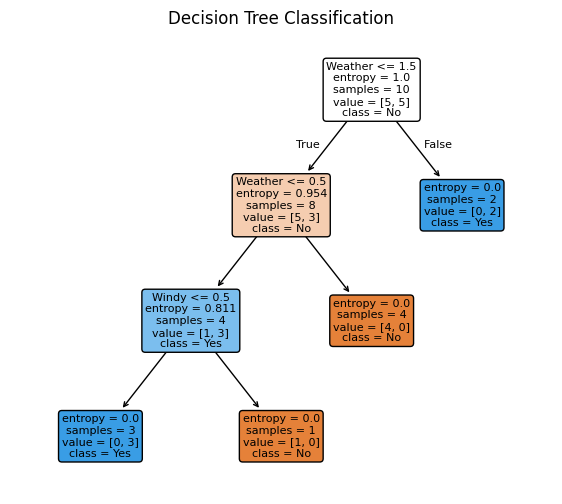

Prediction Output = 0
Readable Class Label = No


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,

)

# Create a synthetic Dataset
dataset = {
    "Weather":["Sunny","Sunny","Overcast","Rainy","Rainy","Rainy","Overcast","Sunny","Sunny","Rainy"],
    "Windy":["0","1","0","0","0","1","1","0","0","0"],
    "Play":["0","0","1","1","1","0","1","0","0","1"]
}
df = pd.DataFrame(dataset)

# Encode Categorical Features
df["Weather"] = df["Weather"].map({"Rainy":0, "Sunny":1, "Overcast":2})
df["Windy"] = df["Windy"].astype(int)
df["Play"] = df["Play"].astype(int)

# Divide into features and target
X = df.drop("Play", axis=1)
y = df["Play"]

# Train a Decision Tree Model
model = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
model.fit(X, y)

# Visualize Decision Tree
plt.figure(figsize=(7,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],   # 0 -> No, 1 -> Yes
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Classification")
plt.show()

# Example Test Input: Weather = 1, Windy = 1
example_1 = pd.DataFrame([[1,1]], columns=['Weather','Windy'])
prediction = model.predict(example_1)[0]

# Print Result with readable label
result_label = "Yes" if prediction == 1 else "No"
print("Prediction Output =", prediction)
print("Readable Class Label =", result_label)


In [92]:
#Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification
X_big,y_big=make_classification(
    n_samples=400,#Row
    n_features=5,#features
    n_informative=3,#essential features=3,noisy=2
    n_redundant=0,#No duplicate/correlations
    n_classes=2,#Target variable class(0 and 1)
    random_state=42,
)
X_big=pd.DataFrame(X_big,columns=['A','B','C','D','E'])
y_big=pd.Series(y_big)
X_big_train,X_big_test,y_big_train,y_big_test=train_test_split(X_big,y_big,test_size=0.25,random_state=42)


In [98]:
#Train a deep tree vs Pruned tree
deep_tree=DecisionTreeClassifier(max_depth=None,random_state=42,criterion='entropy')
deep_tree.fit(X_big_train,y_big_train)
y_pred_deep_test=deep_tree.predict(X_big_test)
y_pred_deep_train=deep_tree.predict(X_big_train)
accuracy_deep_test=accuracy_score(y_big_test,y_pred_deep_test)#test accuracy
accuracy_deep_train=accuracy_score(y_big_train,y_pred_deep_train)#train accuracy


pruned_tree=DecisionTreeClassifier(max_depth=3,random_state=42,criterion='entropy')#max_depth must
pruned_tree.fit(X_big_train,y_big_train)
y_pred_pruned_test=pruned_tree.predict(X_big_test)
y_pred_pruned_train=pruned_tree.predict(X_big_train)
accuracy_pruned_test=accuracy_score(y_big_test,y_pred_pruned_test)#test accuracy
accuracy_pruned_train=accuracy_score(y_big_train,y_pred_pruned_train)#train accuracy

print("Test-Accuracy of Deep Tree:",accuracy_deep_test)
print("Train-Accuracy of Deep Tree:",accuracy_deep_train)

print("Test-Accuracy of Pruned Tree:",accuracy_pruned_test)
print("Train-Accuracy of Pruned Tree:",accuracy_pruned_train)




Test-Accuracy of Deep Tree: 0.85
Train-Accuracy of Deep Tree: 1.0
Test-Accuracy of Pruned Tree: 0.9
Train-Accuracy of Pruned Tree: 0.9233333333333333


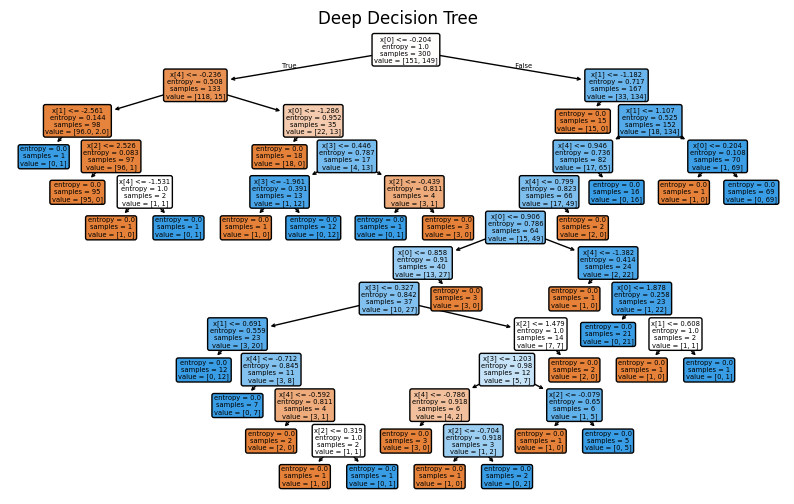

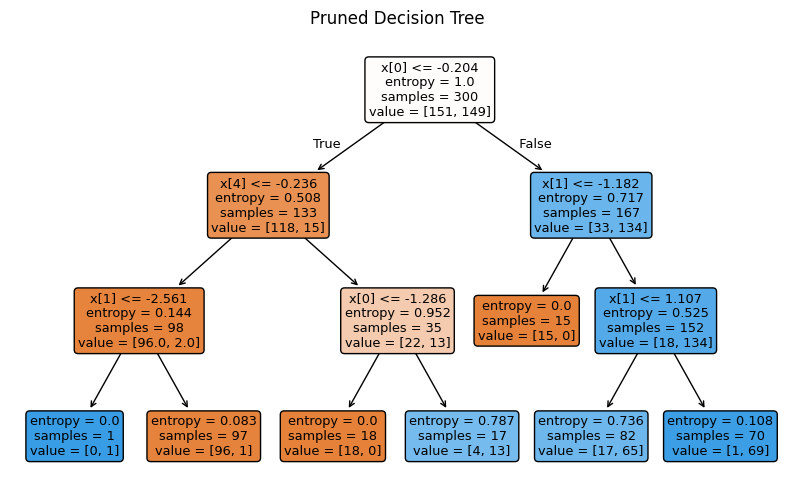

In [103]:
#Plot deep tree(showing only top levels for readability)
plt.figure(figsize=(10,6))
plot_tree(deep_tree,filled=True,rounded=True)
plt.title("Deep Decision Tree")
plt.show()

#Plot Pruned(showing only top levels for readability)
plt.figure(figsize=(10,6))
plot_tree(pruned_tree,filled=True,rounded=True)
plt.title("Pruned Decision Tree")
plt.show()